In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc,precision_recall_curve

In [378]:
data=pd.read_excel("data/data.xlsx")
data

,机器编号,统一规范代码,机器质量等级,工厂温度,机器温度,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,84,L48027,1,296.4,307.4,2833,5.6,213,1,3
1,6986,M15740,2,295.8,306.3,1235,76.2,89,1,3
2,8047,L48083,1,295.7,306.2,2270,14.6,149,1,3
3,4425,M15847,2,296.3,307.1,1534,33.8,151,0,0
4,4519,H30402,3,296.3,307.1,1774,25.9,154,0,0
...,...,...,...,...,...,...,...,...,...,...
8993,8680,M24855,2,298.8,308.4,1604,29.5,14,0,0
8994,194,H39410,3,298.9,308.4,1632,31.8,17,0,0
8995,7860,M24857,2,299.0,308.6,1645,33.4,22,0,0
8996,138,H39412,3,299.0,308.7,1408,48.5,25,0,0


In [379]:
x=data[['机器质量等级','工厂温度','机器温度','转速（rpm）','扭矩（Nm）','使用时长（min）']]
y=data['是否发生故障']

In [380]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)
x_train

,机器质量等级,工厂温度,机器温度,转速（rpm）,扭矩（Nm）,使用时长（min）
6390,2,299.7,310.5,1490,41.2,126
4839,2,301.4,311.2,1541,36.3,28
7165,1,299.6,311.0,1552,33.2,139
5888,2,300.9,311.4,1434,45.4,118
2108,2,299.9,309.2,1353,49.8,182
...,...,...,...,...,...,...
57,1,296.6,307.6,1809,25.1,86
578,1,298.0,308.2,1459,42.1,146
5848,2,301.1,311.3,1389,53.3,8
2439,3,301.5,310.5,1551,34.3,166


In [381]:
#决策树分类
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_y_pred=dtc.predict(x_test)

In [382]:
#输出评估结果
print("The accuracy of dtc is:",dtc.score(x_test,y_test))
print(classification_report(dtc_y_pred,y_test))

The accuracy of dtc is: 0.9817777777777777
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2168
           1       0.77      0.72      0.74        82

    accuracy                           0.98      2250
   macro avg       0.88      0.86      0.87      2250
weighted avg       0.98      0.98      0.98      2250



In [383]:
#随机森林分类器
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y_pred=rfc.predict(x_test)
rfc_y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [384]:
#输出评估结果
print("The accuracy of rfc is:",rfc.score(x_test,y_test))
print(classification_report(rfc_y_pred,y_test))


The accuracy of rfc is: 0.9844444444444445
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2196
           1       0.62      0.89      0.73        54

    accuracy                           0.98      2250
   macro avg       0.81      0.94      0.86      2250
weighted avg       0.99      0.98      0.99      2250



In [385]:
#梯度提升决策树
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_y_pred=gbc.predict(x_test)

In [386]:
#输出评估结果
print("The accuracy of gbc is:",gbc.score(x_test,y_test))
print(classification_report(gbc_y_pred,y_test))

The accuracy of gbc is: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2183
           1       0.74      0.85      0.79        67

    accuracy                           0.99      2250
   macro avg       0.87      0.92      0.89      2250
weighted avg       0.99      0.99      0.99      2250



In [387]:
#XGBoost模型
xgbc=XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc_y_pred=xgbc.predict(x_test)
xgbc_y_pred

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [388]:
#输出评估结果
print("The accuracy of xgbc is:",xgbc.score(x_test,y_test))
print(classification_report(xgbc_y_pred,y_test))

The accuracy of xgbc is: 0.9871111111111112
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2182
           1       0.75      0.85      0.80        68

    accuracy                           0.99      2250
   macro avg       0.87      0.92      0.90      2250
weighted avg       0.99      0.99      0.99      2250



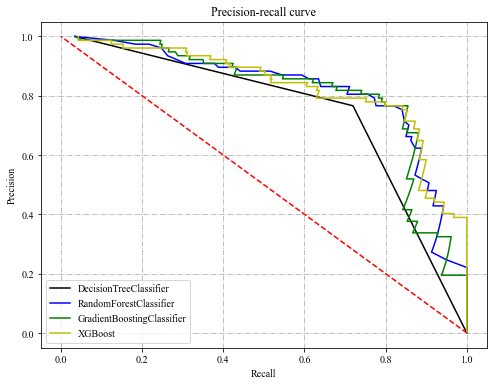

In [412]:
#绘制PR曲线
probas_dtc=dtc.predict_proba(x_test)#决策树
probas_rfc=rfc.predict_proba(x_test)#随机森林
probas_gbc=gbc.predict_proba(x_test)#梯度提升树
probas_xgbc=xgbc.predict_proba(x_test)#XGBoost
precision_dtc,recall_dtc,thresholds_dtc=precision_recall_curve(y_test,probas_dtc[:,1])
precision_rfc,recall_rfc,thresholds_rfc=precision_recall_curve(y_test,probas_rfc[:,1])
precision_gbc,recall_gbc,thresholds_gbc=precision_recall_curve(y_test,probas_gbc[:,1])
precisione_xgbc,recall_xgbc,thresholds_xgbc=precision_recall_curve(y_test,probas_xgbc[:,1])
plt.rcParams['font.family']=['Times New Roman']
plt.rcParams['figure.figsize']=(8,6)
plt.plot(precision_dtc,recall_dtc,color='k',label='DecisionTreeClassifier')
plt.plot(precision_rfc,recall_rfc,color='b',label='RandomForestClassifier')
plt.plot(precision_gbc,recall_gbc,color='g',label='GradientBoostingClassifier')
plt.plot(precisione_xgbc,recall_xgbc,color='y',label='XGBoost')
plt.title('Precision-recall curve')
plt.legend(loc='lower left')
plt.plot([1,0],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(linestyle='-.')  
plt.grid(True)
plt.show()

In [393]:
#预测
forecast_df=pd.read_excel("data/forecast.xlsx")
forecast_df

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）
0,9125,M14860,M,298.1,308.6,1551,42.8,0
1,9401,L47181,L,298.2,308.7,1408,46.3,3
2,9566,L47182,L,298.1,308.5,1498,49.4,5
3,9296,L47183,L,298.2,308.6,1433,39.5,7
4,9376,L47184,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130
996,9173,H33492,H,302.1,310.7,1294,62.4,101
997,9057,L51260,L,302.0,310.4,1357,58.0,108
998,9552,L51261,L,302.0,310.4,1336,58.2,110


In [394]:
forecast_df1=forecast_df.copy()
forecast_df1.rename(columns={'室温（K）':'工厂温度','室温（K）.1':'机器温度'},inplace=True)
dengji={'L':1,'M':2,'H':3}
forecast_df1['机器质量等级']=forecast_df1['机器质量等级'].map(dengji)
forecast_df1

,机器编号,统一规范代码,机器质量等级,工厂温度,机器温度,转速（rpm）,扭矩（Nm）,使用时长（min）
0,9125,M14860,2,298.1,308.6,1551,42.8,0
1,9401,L47181,1,298.2,308.7,1408,46.3,3
2,9566,L47182,1,298.1,308.5,1498,49.4,5
3,9296,L47183,1,298.2,308.6,1433,39.5,7
4,9376,L47184,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...,...
995,9244,H33243,3,302.3,310.9,1366,48.4,130
996,9173,H33492,3,302.1,310.7,1294,62.4,101
997,9057,L51260,1,302.0,310.4,1357,58.0,108
998,9552,L51261,1,302.0,310.4,1336,58.2,110


In [395]:
x_pre=forecast_df1[['机器质量等级','工厂温度','机器温度','转速（rpm）','扭矩（Nm）','使用时长（min）']]
x_pre

,机器质量等级,工厂温度,机器温度,转速（rpm）,扭矩（Nm）,使用时长（min）
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
995,3,302.3,310.9,1366,48.4,130
996,3,302.1,310.7,1294,62.4,101
997,1,302.0,310.4,1357,58.0,108
998,1,302.0,310.4,1336,58.2,110


In [396]:
x_pre.to_excel('data/x_pre.xlsx',index=False)

In [399]:
xgbc_pre=xgbc.predict(x_pre)
xgbc_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [400]:
import collections
countp=collections.Counter(xgbc_pre)
countp

Counter({0: 979, 1: 21})

In [401]:
forecast_df['是否发生故障']=xgbc_pre
forecast_df

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障
0,9125,M14860,M,298.1,308.6,1551,42.8,0,0
1,9401,L47181,L,298.2,308.7,1408,46.3,3,0
2,9566,L47182,L,298.1,308.5,1498,49.4,5,0
3,9296,L47183,L,298.2,308.6,1433,39.5,7,0
4,9376,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130,1
996,9173,H33492,H,302.1,310.7,1294,62.4,101,0
997,9057,L51260,L,302.0,310.4,1357,58.0,108,1
998,9552,L51261,L,302.0,310.4,1336,58.2,110,1


In [402]:
forecast_df.to_excel("data/result1.xlsx",index=False)

In [403]:
x_pre1=forecast_df.loc[forecast_df['是否发生故障']==1]
x_pre1

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障
50,9737,L47230,L,298.9,309.1,2861,4.6,143,1
69,9816,L47249,L,298.9,309.0,1410,65.7,191,1
160,9868,L47340,L,298.4,308.2,1282,60.7,216,1
168,9276,L47348,L,298.4,308.3,1433,62.3,20,1
194,9968,M15054,M,298.2,308.5,2678,10.7,86,1
242,9587,L47422,L,298.0,308.2,1348,58.8,202,1
248,9404,L47428,L,298.0,308.3,1362,56.8,216,1
249,9618,L47429,L,298.0,308.3,1405,56.2,218,1
259,9198,M15119,M,298.1,308.2,1420,63.9,19,1
327,9887,L47507,L,297.7,308.5,1373,56.7,203,1


In [404]:
x_pre1.to_excel('data/x_pre1.xlsx',index=False)